# Активы МСП

In [19]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import itertools
from pmdarima import auto_arima

from parser.loans_volume_msp import get_measures, get_loans_volume_msp_df
from parser.new_loans_msp import get_new_loans_msp_df
from data_transform.transform_df import transform_df_to_format

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

In [20]:
def mape( actual , pred ): 
    actual, pred = np.array(actual), np.array(pred)
    actual_safe = np.where(actual == 0, 1e-10, actual)
    return np.mean(np.abs((actual - pred) / actual_safe))*100


# Объем кредитов региональный разрез
def loans_volume_reg_predict(key, value):
    df = get_new_loans_msp_df(2019, 2024, spikes_remove=False, measure_id=key)
    split_date = '2023-05'
    n = df.index[df['date'] == split_date]
    train_size = n[0]
    test_size = len(df) - train_size
    train = df[df['date']<split_date]
    test = df[df['date']>=split_date]
    # Делаем из датафреймов серии
    trn_ser = train.copy()
    trn_ser.set_index(keys='date', drop=True, inplace=True)
    trn_ser = trn_ser.squeeze(axis=1)
    tst_ser = test.copy()
    tst_ser.set_index(keys='date', drop=True, inplace=True)
    tst_ser = tst_ser.squeeze(axis=1)
    print(value, "\n")
    # Подбор параметров
    parameter_search = auto_arima(trn_ser, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 1, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True) 
    s_ord = parameter_search.seasonal_order
    pdq = parameter_search.order
    # ОБУЧЕНИЕ МОДЕЛИ
    model = SARIMAX(trn_ser, order=pdq, seasonal_order=s_ord, trend='ct' , measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
    model_fit = model.fit() 
    pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
    vol_diff_pred = pred.predicted_mean
    test_pred = vol_diff_pred[0:test_size]
    mp = mape(tst_ser.values, test_pred.values)
    print("MAPE = ", mp)
    print("\nСпрогнозированные значения:")
    print(vol_diff_pred)
    plt.figure(figsize=(12, 4))
    plt.plot(df['date'], df['msp_loans'].values/1e6)
    plt.plot(vol_diff_pred/1e6)
    plt.xlabel('date')
    plt.ylabel('Объем кредитов, трлн руб.')
    plt.title(value)
    plt.grid(True)
    plt.show()
    
    
# Объем задолженности региональный разрез
def debt_reg_predict(key, value):
    df = get_loans_volume_msp_df(2019, 2024, spikes_remove=False, measure_id=key)
    split_date = '2023-05'
    n = df.index[df['date'] == split_date]
    train_size = n[0]
    test_size = len(df) - train_size
    train = df[df['date']<split_date]
    test = df[df['date']>=split_date]
    # Делаем из датафреймов серии
    trn_ser = train.copy()
    trn_ser.set_index(keys='date', drop=True, inplace=True)
    trn_ser = trn_ser.squeeze(axis=1)
    tst_ser = test.copy()
    tst_ser.set_index(keys='date', drop=True, inplace=True)
    tst_ser = tst_ser.squeeze(axis=1)
    print(value, "\n")
    # Подбор параметров
    parameter_search = auto_arima(trn_ser, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 1, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True) 
    s_ord = parameter_search.seasonal_order
    pdq = parameter_search.order
    # ОБУЧЕНИЕ МОДЕЛИ
    model = SARIMAX(trn_ser, order=pdq, seasonal_order=s_ord, trend='ct' , measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
    model_fit = model.fit() 
    pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
    vol_diff_pred = pred.predicted_mean
    test_pred = vol_diff_pred[0:test_size]
    mp = mape(tst_ser.values, test_pred.values)
    print("MAPE = ", mp)
    print("\nСпрогнозированные значения:")
    print(vol_diff_pred)
    plt.figure(figsize=(12, 4))
    plt.plot(df['date'], df['msp_loans_volume'].values/1e6)
    plt.plot(vol_diff_pred/1e6)
    plt.xlabel('date')
    plt.ylabel('Объем задолженности по кредитам, трлн руб.')
    plt.title(value)
    plt.grid(True)
    plt.show()

# Региональный разрез

In [21]:
regions = get_measures()

for key,value in regions.items():
    print(key, ' - ', value)


22  -  Российская Федерация
23  -  Центральный федеральный округ
24  -  Белгородская область
25  -  Брянская область
26  -  Владимирская область
27  -  Воронежская область
28  -  Ивановская область
29  -  Калужская область
30  -  Костромская область
31  -  Курская область
32  -  Липецкая область
33  -  Московская область
34  -  Орловская область
35  -  Рязанская область
36  -  Смоленская область
37  -  Тамбовская область
38  -  Тверская область
39  -  Тульская область
40  -  Ярославская область
41  -  г. Москва
42  -  Северо-Западный федеральный округ
43  -  Республика Карелия
44  -  Республика Коми
45  -  Архангельская область
46  -  Архангельская область, в том числе Ненецкий автономный округ
47  -  Архангельская область без данных по Ненецкому автономному округу
48  -  Вологодская область
49  -  Калининградская область
50  -  Ленинградская область
51  -  Мурманская область
52  -  Новгородская область
53  -  Псковская область
54  -  г. Санкт-Петербург
55  -  Южный федеральный округ
5

## Объем кредитов, выданных МСП:

Центральный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1020.331, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1043.222, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1026.548, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1030.253, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1046.331, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1023.716, Time=0.27 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1018.333, Time=0.26 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1040.881, Time=0.06 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1020.328, Time=0.41 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=1022.165, Time=0.77 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1028.518, Time=0.11 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=1020.059, Time=0.39 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=1017.502, Time=0.32 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1044.153, T

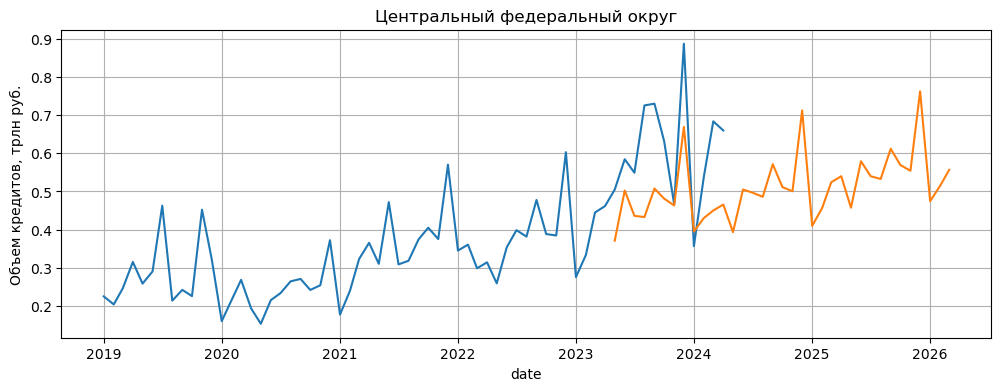

Северо-Западный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=962.335, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=959.966, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=960.170, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=960.746, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=964.341, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=959.360, Time=0.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=959.293, Time=0.10 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=960.391, Time=0.36 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=960.279, Time=0.37 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=961.114, Time=0.17 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=961.524, Time=0.14 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=962.345, Time=0.28 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=964.855, Time=0.10 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12] intercept
Total fit time:

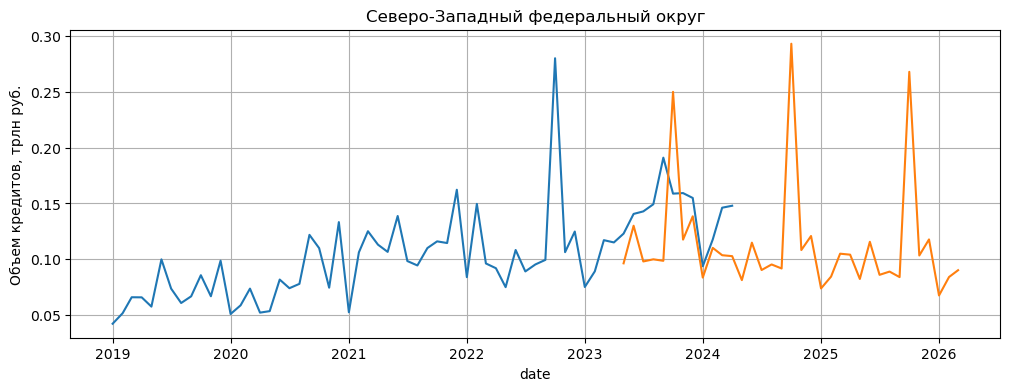

Южный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=868.141, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=877.947, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=874.095, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=871.497, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=905.375, Time=0.03 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=869.243, Time=0.25 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=866.212, Time=0.26 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=878.850, Time=0.06 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=868.203, Time=0.42 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=869.579, Time=1.81 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=873.734, Time=0.11 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=866.827, Time=0.34 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=867.677, Time=0.33 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=873.711, Time=0.08 sec
 ARIMA(

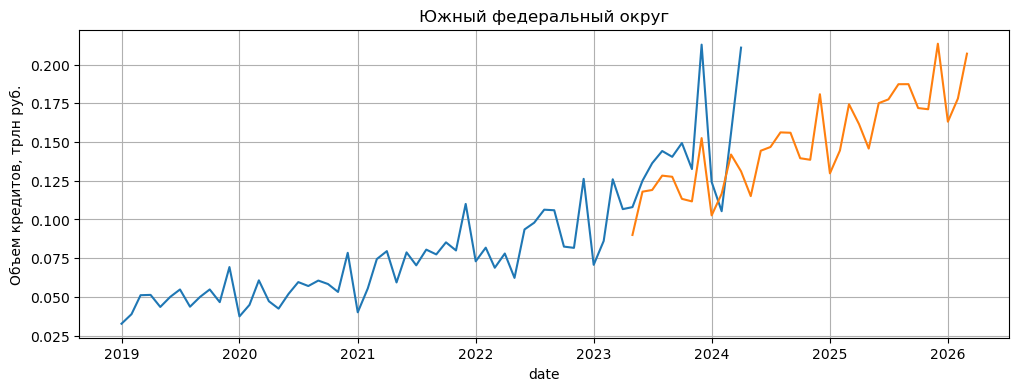

Северо-Кавказский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=787.410, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=787.352, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=787.008, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=786.518, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=794.149, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=789.146, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=786.998, Time=0.17 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=787.220, Time=0.16 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=787.670, Time=0.09 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=787.810, Time=0.30 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=784.628, Time=0.07 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=785.727, Time=0.11 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=785.540, Time=0.11 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=782.583, Time=0.18

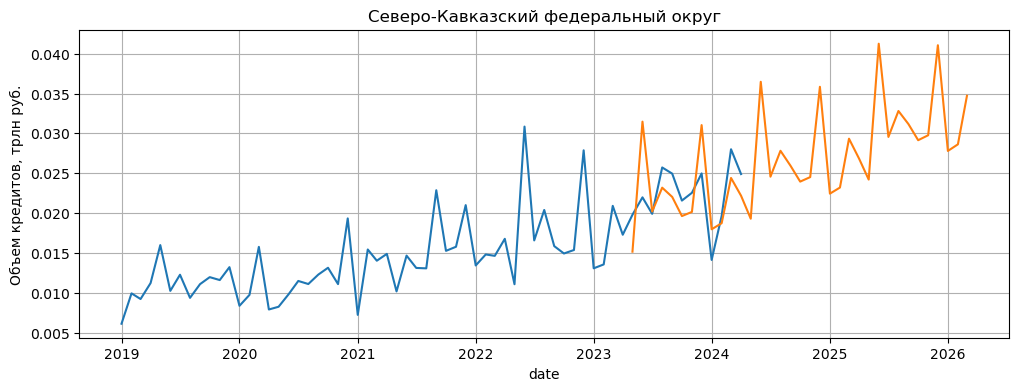

Приволжский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=907.457, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=926.893, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=915.903, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=917.938, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=939.334, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=915.590, Time=0.22 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=910.435, Time=0.22 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=909.326, Time=0.97 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=909.338, Time=0.86 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=923.811, Time=0.05 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=913.082, Time=0.69 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=909.697, Time=0.40 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=916.726, Time=0.26 sec
 ARIM

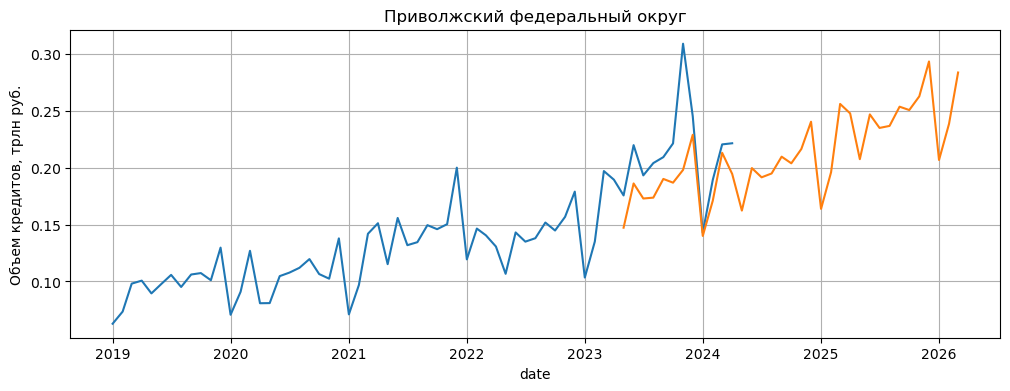

Уральский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=907.269, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=909.670, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=907.815, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=908.299, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=919.651, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=906.902, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=911.688, Time=0.04 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=907.839, Time=0.28 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=905.454, Time=0.17 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=907.388, Time=0.34 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=909.215, Time=0.42 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=909.117, Time=0.08 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=907.040, Time=0.21 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=906.442, Time=0.17 sec
 AR

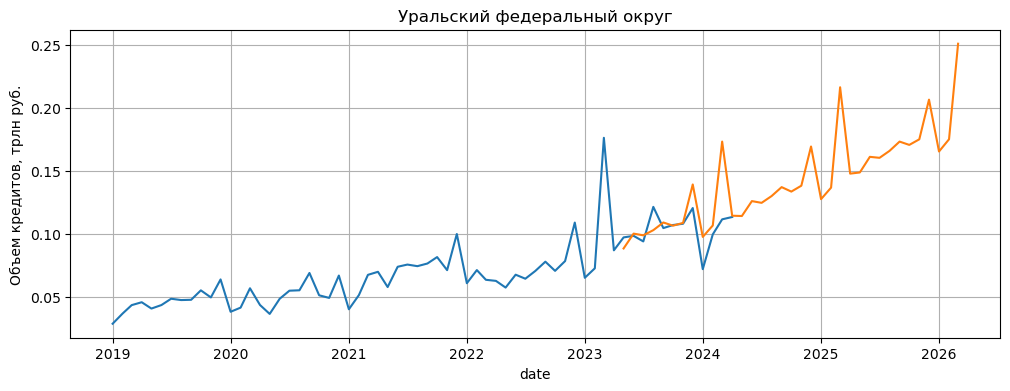

Сибирский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=866.152, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=880.777, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=872.822, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=873.852, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=895.456, Time=0.03 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=871.800, Time=0.24 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=867.952, Time=0.24 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=868.098, Time=0.92 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=868.055, Time=0.75 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=879.329, Time=0.06 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=868.712, Time=0.55 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=866.818, Time=0.34 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=874.275, Time=0.29 sec
 ARIMA(

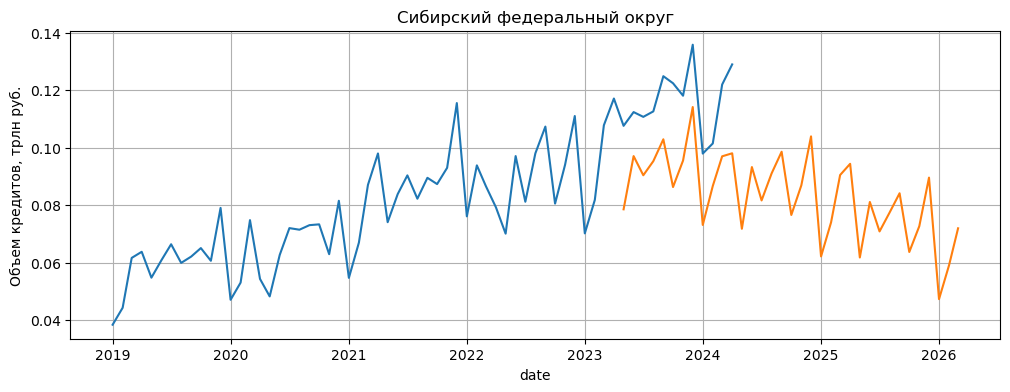

Дальневосточный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=861.544, Time=1.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=864.087, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=858.545, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=859.764, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=870.332, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=865.696, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=860.443, Time=0.22 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=859.466, Time=0.37 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=857.723, Time=0.17 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=859.037, Time=0.22 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=860.075, Time=0.47 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=857.172, Time=0.10 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=857.289, Time=0.31 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=858.622, Time=0.13 s

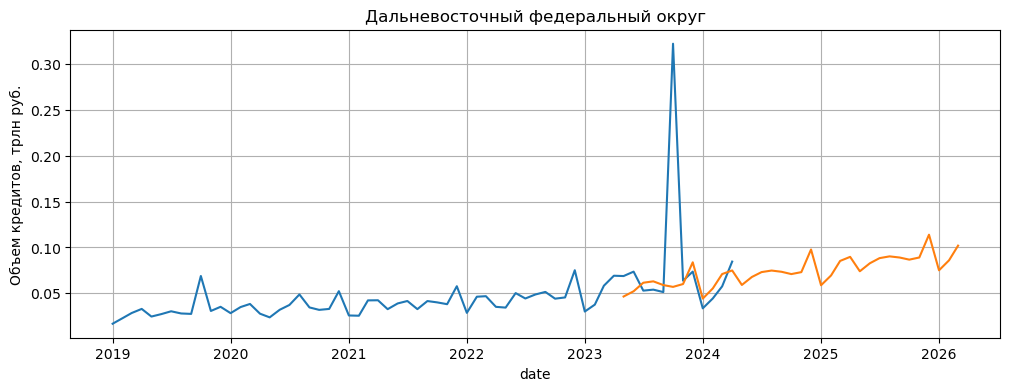

In [22]:
for key,value in regions.items():
    if key in [23, 42, 55, 64, 72, 87, 95, 106]:
        loans_volume_reg_predict(key, value)

Увеличим точность отдельных прогнозов:

Центральный федеральный округ 

MAPE =  17.769737305210178

Спрогнозированные значения:
2023-06-01    537435.088151
2023-07-01    493553.038098
2023-08-01    486889.670548
2023-09-01    563954.813630
2023-10-01    533272.290115
2023-11-01    518977.243281
2023-12-01    727897.389056
2024-01-01    451680.906014
2024-02-01    491747.134942
2024-03-01    522374.750824
2024-04-01    540634.703858
2024-05-01    539119.553598
2024-06-01    603384.357862
2024-07-01    603865.739560
2024-08-01    594521.528240
2024-09-01    682681.547491
2024-10-01    626204.464209
2024-11-01    619095.757534
2024-12-01    834495.478348
2025-01-01    536146.085089
2025-02-01    587114.066034
2025-03-01    658112.440973
2025-04-01    677763.703330
2025-05-01    699663.722612
2025-06-01    750989.475511
2025-07-01    732452.707770
2025-08-01    726522.941237
2025-09-01    811528.590428
2025-10-01    769487.497196
2025-11-01    761088.166930
2025-12-01    975534.278061
2026-01-01    689874.853734
2026-02-01    73

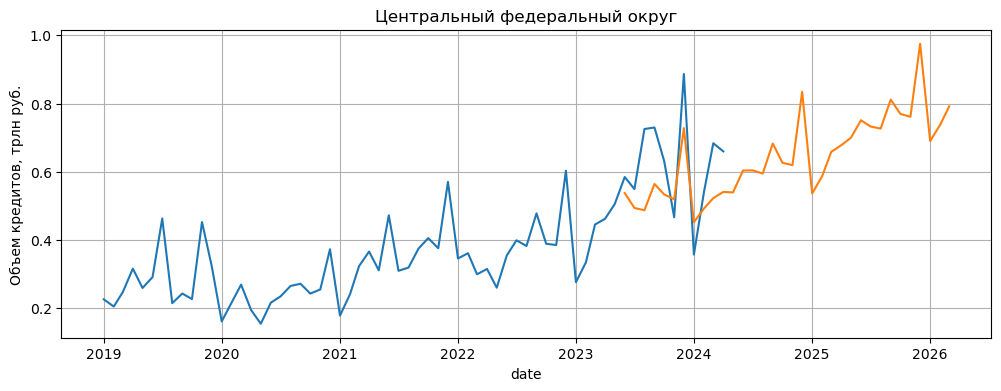

In [41]:
value = "Центральный федеральный округ"
key = 23
df = get_new_loans_msp_df(2019, 2024, spikes_remove=False, measure_id=key)
# print(df)

split_date = '2023-06'
n = df.index[df['date'] == split_date]
train_size = n[0]
test_size = len(df) - train_size
train = df[df['date']<split_date]
test = df[df['date']>=split_date]

# Делаем из датафреймов серии
trn_ser = train.copy()
trn_ser.set_index(keys='date', drop=True, inplace=True)
trn_ser = trn_ser.squeeze(axis=1)
tst_ser = test.copy()
tst_ser.set_index(keys='date', drop=True, inplace=True)
tst_ser = tst_ser.squeeze(axis=1)
print(value, "\n")

# Подбор параметров
s_ord = (1,1,0,12)
pdq = (1,0,2)

# ОБУЧЕНИЕ МОДЕЛИ
model = SARIMAX(trn_ser, order=pdq, seasonal_order=s_ord, trend='ct', measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
model_fit = model.fit() 
pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
vol_diff_pred = pred.predicted_mean
test_pred = vol_diff_pred[0:test_size]
mp = mape(tst_ser.values, test_pred.values)
print("MAPE = ", mp)
print("\nСпрогнозированные значения:")
print(vol_diff_pred)
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['msp_loans'].values/1e6)
plt.plot(vol_diff_pred/1e6)
plt.xlabel('date')
plt.ylabel('Объем кредитов, трлн руб.')
plt.title(value)
plt.grid(True)
plt.show()

Северо-Западный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=960.442, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=966.679, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=960.234, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=962.989, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=972.137, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=962.065, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=961.590, Time=0.27 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=959.977, Time=0.30 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=959.353, Time=0.12 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=961.351, Time=0.23 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=961.068, Time=0.48 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=964.650, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=958.286, Time=0.18 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=963.743, Time=0.05 s

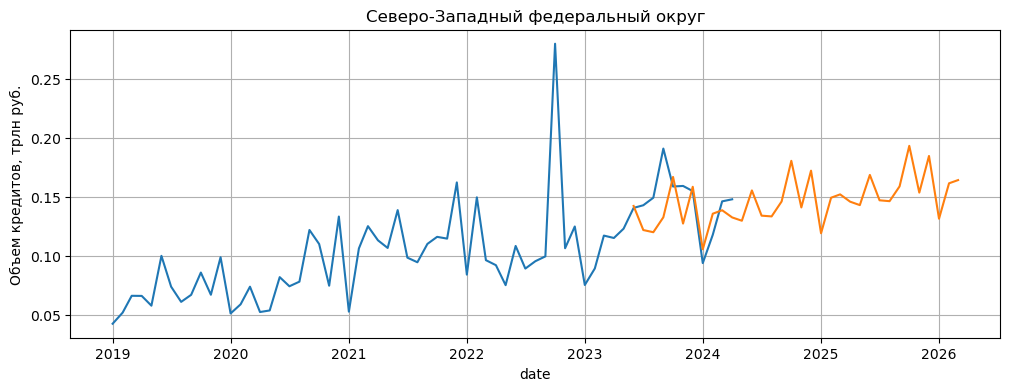

In [53]:
value = "Северо-Западный федеральный округ"
key = 42
df = get_new_loans_msp_df(2019, 2024, spikes_remove=False, measure_id=key)

split_date = '2023-06'
n = df.index[df['date'] == split_date]
train_size = n[0]
test_size = len(df) - train_size
train = c_df[c_df['date']<split_date]
test = c_df[c_df['date']>=split_date]

# Делаем из датафреймов серии
trn_ser = train.copy()
trn_ser.set_index(keys='date', drop=True, inplace=True)
trn_ser = trn_ser.squeeze(axis=1)
tst_ser = test.copy()
tst_ser.set_index(keys='date', drop=True, inplace=True)
tst_ser = tst_ser.squeeze(axis=1)
print(value, "\n")
# Подбор параметров

parameter_search = auto_arima(trn_ser, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 1, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True) 
s_ord = parameter_search.seasonal_order
pdq = parameter_search.order

# ОБУЧЕНИЕ МОДЕЛИ
model = SARIMAX(trn_ser, order=pdq, seasonal_order=s_ord, trend='ct', measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
model_fit = model.fit() 
pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
vol_diff_pred = pred.predicted_mean
test_pred = vol_diff_pred[0:test_size]
mp = mape(tst_ser.values, test_pred.values)
print("MAPE = ", mp)
print("\nСпрогнозированные значения:")
print(vol_diff_pred)
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['msp_loans'].values/1e6)
plt.plot(vol_diff_pred/1e6)
plt.xlabel('date')
plt.ylabel('Объем кредитов, трлн руб.')
plt.title(value)
plt.grid(True)
plt.show()

Сибирский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=900.638, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=912.668, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.323, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=907.576, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=924.676, Time=0.03 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=905.618, Time=0.22 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=902.809, Time=0.22 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=902.619, Time=0.78 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=902.603, Time=0.66 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=911.142, Time=0.05 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=905.577, Time=0.36 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=902.730, Time=0.38 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=906.916, Time=0.29 sec
 ARIMA(

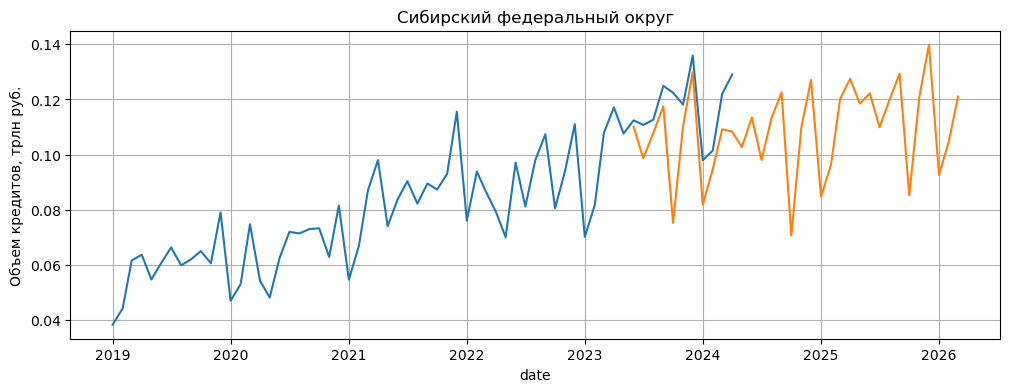

In [56]:
value = "Сибирский федеральный округ"
key = 95
df = get_new_loans_msp_df(2019, 2024, spikes_remove=False, measure_id=key)
# print(df[df['date'] < '2023-02'])
# В строке 45 (2022-10-01   280032.0) - резкий скачок данных. Их необходимо искуственно сгладить
c_df = df.copy()
c_df.at[45, 'msp_loans'] = c_df.at[45, 'msp_loans'] / 1.5

split_date = '2023-06'
n = df.index[df['date'] == split_date]
train_size = n[0]
test_size = len(df) - train_size
train = c_df[c_df['date']<split_date]
test = c_df[c_df['date']>=split_date]

# Делаем из датафреймов серии
trn_ser = train.copy()
trn_ser.set_index(keys='date', drop=True, inplace=True)
trn_ser = trn_ser.squeeze(axis=1)
tst_ser = test.copy()
tst_ser.set_index(keys='date', drop=True, inplace=True)
tst_ser = tst_ser.squeeze(axis=1)
print(value, "\n")
# Подбор параметров

parameter_search = auto_arima(trn_ser, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 1, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True) 
s_ord = parameter_search.seasonal_order
pdq = parameter_search.order

# ОБУЧЕНИЕ МОДЕЛИ
model = SARIMAX(trn_ser, order=pdq, seasonal_order=s_ord, measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
model_fit = model.fit() 
pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
vol_diff_pred = pred.predicted_mean
test_pred = vol_diff_pred[0:test_size]
mp = mape(tst_ser.values, test_pred.values)
print("MAPE = ", mp)
print("\nСпрогнозированные значения:")
print(vol_diff_pred)
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['msp_loans'].values/1e6)
plt.plot(vol_diff_pred/1e6)
plt.xlabel('date')
plt.ylabel('Объем кредитов, трлн руб.')
plt.title(value)
plt.grid(True)
plt.show()

ОБЪЕМ ЗАДАЛЖЕННОСТИ МСП:

Центральный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1030.296, Time=0.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1026.308, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1027.417, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1027.231, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1026.877, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1035.949, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1026.106, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1027.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1027.996, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1027.947, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1025.963, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1027.336, Time=0.10 s

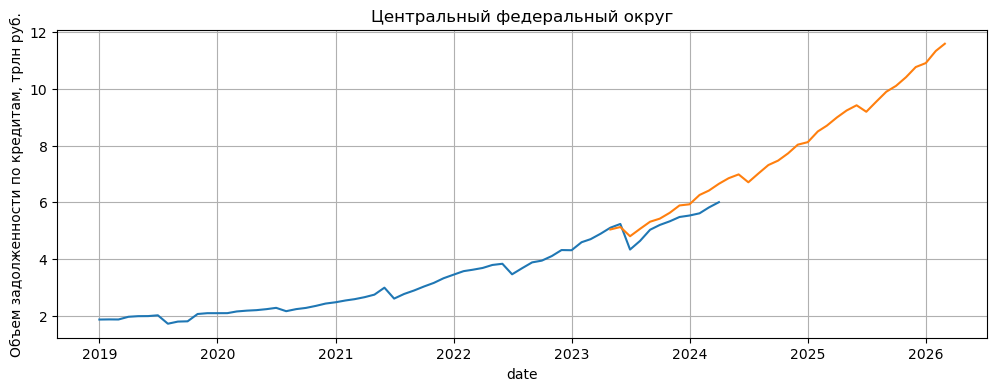

Северо-Западный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1030.167, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1052.324, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1031.258, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1029.620, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1092.853, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1037.181, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1030.668, Time=0.28 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1029.475, Time=0.28 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1030.854, Time=0.42 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1039.194, Time=0.22 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1024.984, Time=0.30 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1028.988, Time=0.18 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1024.270, Time=0.73 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Ti

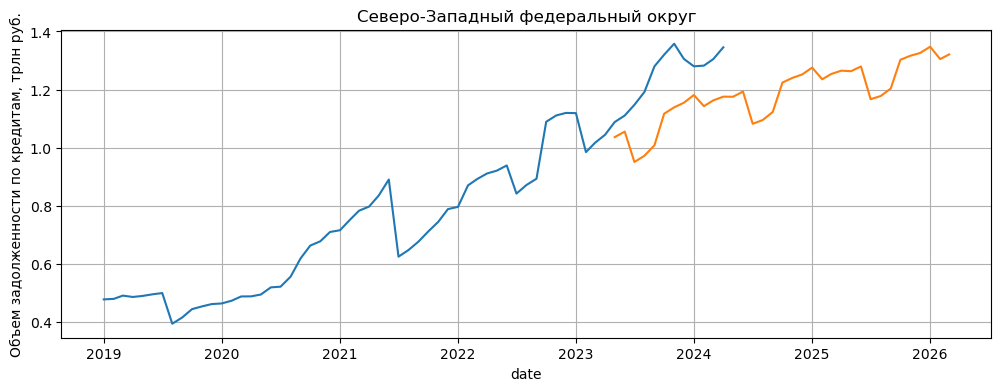

Южный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=869.018, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=861.480, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=865.331, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=865.500, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=865.172, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=896.312, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=889.075, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=863.372, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=863.543, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=865.523, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=853.263, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=855.262, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=855.262, Time=0.17 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=857.262, Time=0.14 sec
 ARIMA(

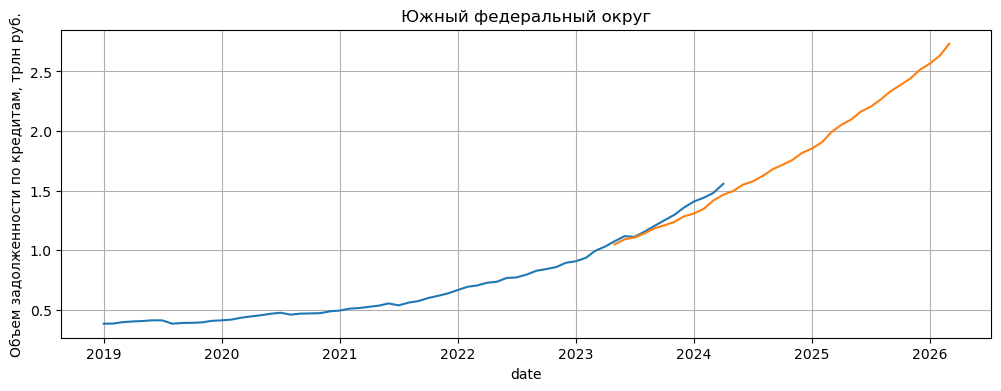

Северо-Кавказский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=785.911, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=789.764, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=789.828, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=787.942, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=795.855, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=787.826, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=787.895, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=789.748, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=786.009, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.974 seconds
MAPE =  5.494563815111983

Спрогнозированные значения:
2023-05-01    224313.136686
2023-06-01    230923.683477
2023-07-01  

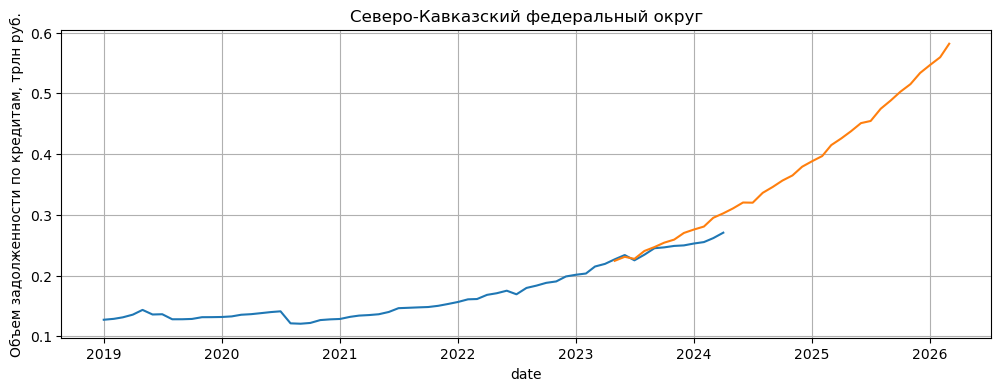

Приволжский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=890.185, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=884.119, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=886.541, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=886.443, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=887.265, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=888.682, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=891.381, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=884.809, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=884.707, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=886.674, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=882.546, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=884.437, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=884.434, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=886.431, Time=0.21 sec
 

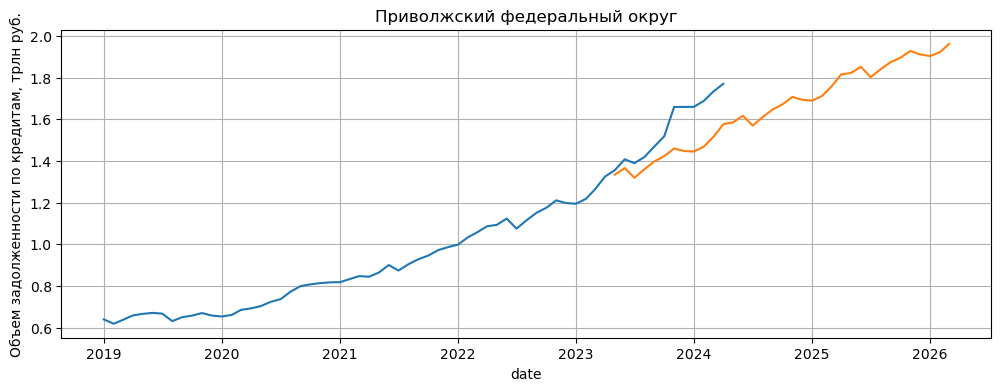

Уральский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=892.116, Time=1.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=884.521, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=888.403, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=888.596, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=888.254, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=945.133, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=886.426, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=886.619, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=888.227, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=883.732, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=885.648, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=885.645, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=887.644, Time=0.20 sec
 ARIMA(

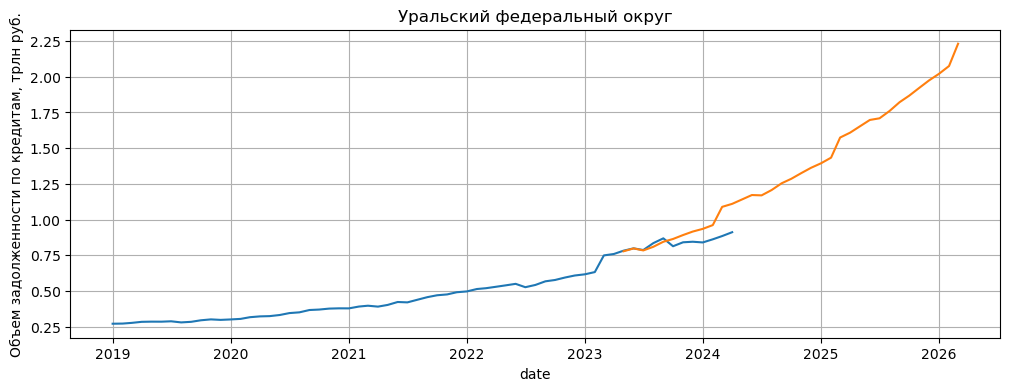

Сибирский федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=847.812, Time=0.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=840.898, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=843.667, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=843.935, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=842.328, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=851.654, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=843.714, Time=0.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=842.703, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=842.886, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=844.763, Time=0.08 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=839.917, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=841.081, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=841.102, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=843.065, Time=0.12 sec
 AR

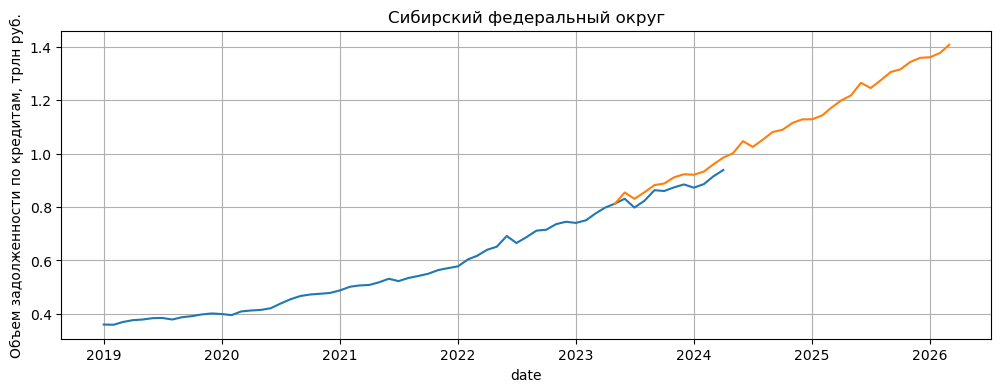

Дальневосточный федеральный округ 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=908.879, Time=1.39 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=914.695, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=927.901, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=908.693, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1024.442, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=911.648, Time=0.04 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=908.814, Time=0.24 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=912.207, Time=0.22 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=910.454, Time=0.39 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=908.597, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=908.037, Time=0.14 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=909.250, Time=0.61 sec
 ARI

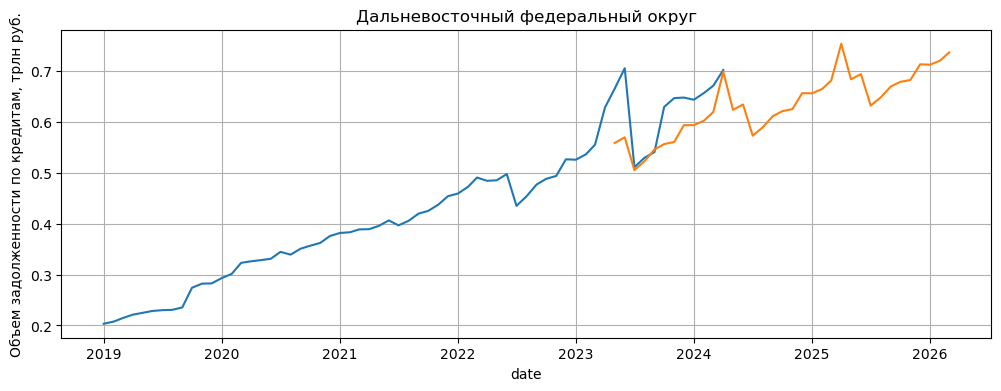

In [23]:
for key,value in regions.items():
    if key in [23, 42, 55, 64, 72, 87, 95, 106]:
        debt_reg_predict(key, value)

# Временной разрез

## Объем кредитов, выданных МСП:

1057.3793635634709
2023-05-01    1.038629e+06
2023-06-01    1.326223e+06
2023-07-01    1.230858e+06
2023-08-01    1.259380e+06
2023-09-01    1.391760e+06
2023-10-01    1.428776e+06
2023-11-01    1.338544e+06
2023-12-01    1.744939e+06
2024-01-01    1.148829e+06
2024-02-01    1.312077e+06
2024-03-01    1.492811e+06
2024-04-01    1.448014e+06
2024-05-01    1.330400e+06
2024-06-01    1.619299e+06
2024-07-01    1.568268e+06
2024-08-01    1.608166e+06
2024-09-01    1.748438e+06
2024-10-01    1.786862e+06
2024-11-01    1.682801e+06
2024-12-01    2.092701e+06
2025-01-01    1.481045e+06
2025-02-01    1.646289e+06
2025-03-01    1.932397e+06
2025-04-01    1.878990e+06
2025-05-01    1.767335e+06
2025-06-01    2.064621e+06
2025-07-01    2.002856e+06
2025-08-01    2.046521e+06
2025-09-01    2.192019e+06
2025-10-01    2.238456e+06
2025-11-01    2.149067e+06
2025-12-01    2.565887e+06
2026-01-01    1.969499e+06
2026-02-01    2.142166e+06
2026-03-01    2.389873e+06
Freq: MS, Name: predicted_mean, dtyp

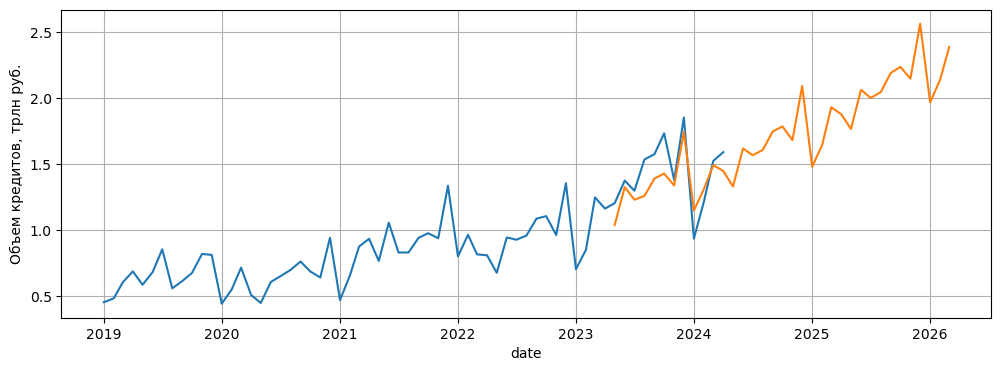

MAPE =  10.05308092802134


In [17]:
df =get_new_loans_msp_df(2019, 2024, spikes_remove=False, measure_id=22)

split_date = '2023-05'
n = df.index[df['date'] == split_date]
train_size = n[0]
test_size = len(df) - train_size

# разделение данных на тестовые и тренировочные

train = df[df['date']<split_date]
test = df[df['date']>=split_date]

# Делаем из датафреймов серии

trn_ser = train.copy()
trn_ser.set_index(keys='date', drop=True, inplace=True)
trn_ser = trn_ser.squeeze(axis=1)

tst_ser = test.copy()
tst_ser.set_index(keys='date', drop=True, inplace=True)
tst_ser = tst_ser.squeeze(axis=1)

df_ser = df.copy()
df_ser.set_index(keys='date', drop=True, inplace=True)
df_ser = df_ser.squeeze(axis=1)


#print(adfuller(trn_ser))
# обучение модели
# используем сырые данные
# Параметры модели позоваляют привести данные в стационарный вид и обратно
model = SARIMAX(trn_ser, order=(1,1,1), seasonal_order=(1,1,1,12), trend='ct', measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
model_fit = model.fit() 
print(model_fit.aic)

pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
pred_ci = pred.conf_int(alpha = 0.05) 
vol_diff_pred = pred.predicted_mean
print(vol_diff_pred)

plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['msp_loans'].values/ 1e6)
plt.plot(vol_diff_pred / 1e6)
plt.xlabel('date')
plt.ylabel('Объем кредитов, трлн руб.')
plt.grid(True)
plt.show()

test_pred = vol_diff_pred[0:test_size]
print("MAPE = ",mape(tst_ser.values, test_pred.values))



ОБЪЕМ ЗАДАЛЖЕННОСТИ МСП:

1075.2744232369396
2023-05-01    1.089059e+07
2023-06-01    1.111365e+07
2023-07-01    1.053190e+07
2023-08-01    1.095011e+07
2023-09-01    1.135916e+07
2023-10-01    1.171636e+07
2023-11-01    1.202713e+07
2023-12-01    1.236514e+07
2024-01-01    1.248968e+07
2024-02-01    1.275593e+07
2024-03-01    1.320120e+07
2024-04-01    1.366386e+07
2024-05-01    1.388569e+07
2024-06-01    1.414282e+07
2024-07-01    1.358079e+07
2024-08-01    1.402199e+07
2024-09-01    1.445982e+07
2024-10-01    1.484779e+07
2024-11-01    1.519389e+07
2024-12-01    1.556204e+07
2025-01-01    1.563373e+07
2025-02-01    1.593149e+07
2025-03-01    1.640419e+07
2025-04-01    1.689051e+07
2025-05-01    1.713690e+07
2025-06-01    1.741515e+07
2025-07-01    1.688713e+07
2025-08-01    1.735798e+07
2025-09-01    1.781864e+07
2025-10-01    1.822634e+07
2025-11-01    1.858655e+07
2025-12-01    1.897274e+07
2026-01-01    1.914246e+07
2026-02-01    1.945461e+07
2026-03-01    1.994451e+07
Freq: MS, Name: predicted_mean, dtyp

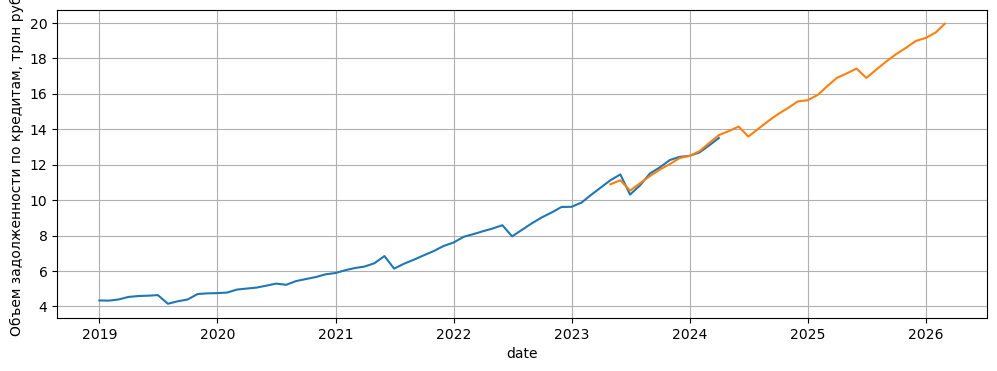

1.3078966064677642

In [18]:
df = get_loans_volume_msp_df(2019, 2024, spikes_remove=False)

split_date = '2023-05'
n = df.index[df['date'] == split_date]
train_size = n[0]
test_size = len(df) - train_size

# разделение данных на тестовые и тренировочные

train = df[df['date']<split_date]
test = df[df['date']>=split_date]

# Делаем из датафреймов серии

trn_ser = train.copy()
trn_ser.set_index(keys='date', drop=True, inplace=True)
trn_ser = trn_ser.squeeze(axis=1)

tst_ser = test.copy()
tst_ser.set_index(keys='date', drop=True, inplace=True)
tst_ser = tst_ser.squeeze(axis=1)

df_ser = df.copy()
df_ser.set_index(keys='date', drop=True, inplace=True)
df_ser = df_ser.squeeze(axis=1)

# обучение модели
# используем сырые данные
# Параметры модели позоваляют привести данные в стационарный вид и обратно
model = SARIMAX(trn_ser, order=(1,1,1), seasonal_order=(1,1,1,12), trend='ct' , measurement_error=True, enforce_stationarity=True, enforce_invertibility=True ) 
model_fit = model.fit() 
print(model_fit.aic)

pred = model_fit.get_prediction(start=split_date, end='2026-03-01', dynamic=False)
pred_ci = pred.conf_int(alpha = 0.05) 
vol_diff_pred = pred.predicted_mean
print(vol_diff_pred)

plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['msp_loans_volume'].values/ 1e6)
plt.plot(vol_diff_pred / 1e6)
plt.xlabel('date')
plt.ylabel('Объем задолженности по кредитам, трлн руб.')
plt.grid(True)
plt.show()

test_pred = vol_diff_pred[0:test_size]
mape(tst_ser.values, test_pred.values)